In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, AveragePooling1D

In [2]:
df = pd.read_csv("customer_reviews.tsv", sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
X = df['Review']
y = df['Liked'].to_numpy()

In [4]:
word_length = 16

# Tokenizer
tokenizer = Tokenizer(
    num_words=word_length,
    oov_token='<oov>'
)
tokenizer.fit_on_texts(X)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=2)

In [54]:

train_sequences = tokenizer.texts_to_sequences(x_train)
train_padding = pad_sequences(train_sequences, maxlen=word_length, padding='post')

test_sequences = tokenizer.texts_to_sequences(x_test)
test_padding = pad_sequences(test_sequences, maxlen=word_length, padding='post')


test_padding

array([[ 2,  1,  1, ...,  7,  2,  1],
       [ 1,  1,  5, ...,  1,  1,  1],
       [ 4,  1, 13, ...,  0,  0,  0],
       ...,
       [ 2, 12,  8, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  4, ...,  2,  1,  5]])

In [108]:
embedding_dim = 32
vocab_size = 32

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=word_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 16, 32)            1024      
                                                                 
 global_average_pooling1d_16  (None, 32)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_45 (Dense)            (None, 32)                1056      
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


In [109]:
history = model.fit(train_padding, y_train, epochs=200 ,validation_data=(test_padding, y_test), verbose=2)

Epoch 1/200
25/25 - 2s - loss: 0.6928 - accuracy: 0.5125 - val_loss: 0.6920 - val_accuracy: 0.5550 - 2s/epoch - 85ms/step
Epoch 2/200
25/25 - 0s - loss: 0.6914 - accuracy: 0.5437 - val_loss: 0.6902 - val_accuracy: 0.5500 - 169ms/epoch - 7ms/step
Epoch 3/200
25/25 - 0s - loss: 0.6900 - accuracy: 0.5512 - val_loss: 0.6892 - val_accuracy: 0.5500 - 148ms/epoch - 6ms/step
Epoch 4/200
25/25 - 0s - loss: 0.6883 - accuracy: 0.5638 - val_loss: 0.6856 - val_accuracy: 0.5650 - 167ms/epoch - 7ms/step
Epoch 5/200
25/25 - 0s - loss: 0.6863 - accuracy: 0.5688 - val_loss: 0.6828 - val_accuracy: 0.5850 - 188ms/epoch - 8ms/step
Epoch 6/200
25/25 - 0s - loss: 0.6832 - accuracy: 0.5775 - val_loss: 0.6800 - val_accuracy: 0.5950 - 158ms/epoch - 6ms/step
Epoch 7/200
25/25 - 0s - loss: 0.6811 - accuracy: 0.5600 - val_loss: 0.6765 - val_accuracy: 0.5950 - 147ms/epoch - 6ms/step
Epoch 8/200
25/25 - 0s - loss: 0.6763 - accuracy: 0.5913 - val_loss: 0.6688 - val_accuracy: 0.6200 - 202ms/epoch - 8ms/step
Epoch 9/20

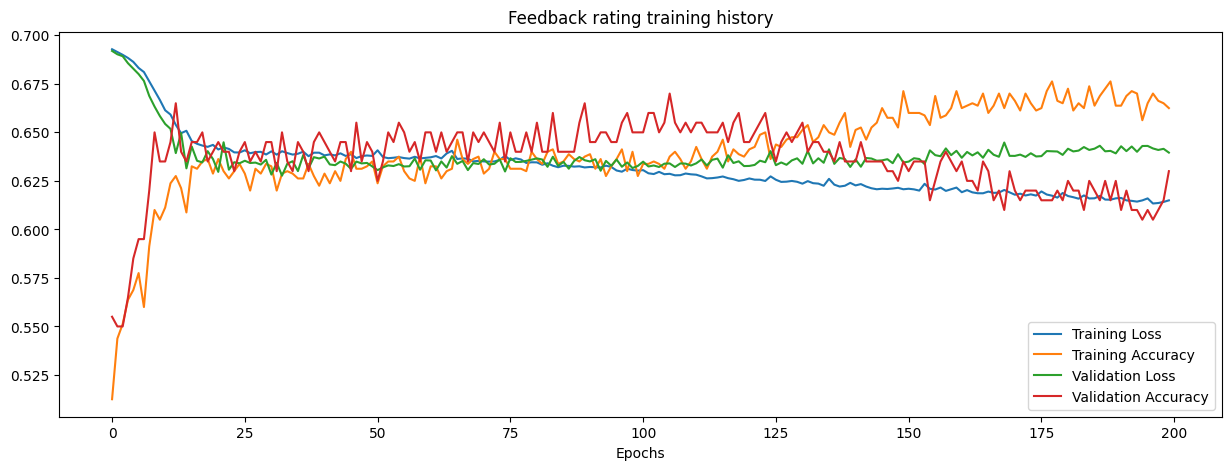

In [110]:
plt.figure(figsize=(15,5))
plt.title("Feedback rating training history")

plt.xlabel("Epochs")

x = history.epoch
plt.plot(x,history.history['loss'])
plt.plot(x,history.history['accuracy'])
plt.plot(x,history.history['val_loss'])
plt.plot(x,history.history['val_accuracy'])


plt.legend(["Training Loss", "Training Accuracy", "Validation Loss", "Validation Accuracy"])

plt.show()

In [83]:
def feedback_level(sentence):
    test_seq_pad = pad_sequences(tokenizer.texts_to_sequences([sentence]),maxlen=16, padding='post')
    predictions = model.predict(test_seq_pad, verbose=0)
    lvl = int(predictions[0][0]*5)
    print(f"Feedback Rating: {lvl}")

In [111]:
feedback_level("The interior is just beautiful")

Feedback Rating: 3


In [ ]:
# save the model
model.save("model/feedback_rating.h5")

#save tokenizer
tokenizer_json = tokenizer.to_json()
with open('tokenizers/feedback_rating_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)